[View in Colaboratory](https://colab.research.google.com/github/yomnabarakate21/Computer-vision-Course-assignments/blob/master/assignm_1.ipynb)

In [0]:
import random;
from pylab import *
from numpy import *;
import cv2 
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the image
test_downloaded=drive.CreateFile({'id':'1CV5O96rjh4XtKW7DJo_mFpffIwsUQw0Q'})
#test_downloaded = drive.CreateFile({'id':'1bX53PbUb8-fGBP3q0s89y4GqV5YtYFwa'}) # replace the id with id of file you want to access
#test_downloaded = drive.CreateFile({'id':'1XNU2FZKIm8xde7fGMI2_UpRurdZ5jaGc'}) # replace the id with id of file you want to access
test_downloaded.GetContentFile('img.PNG')

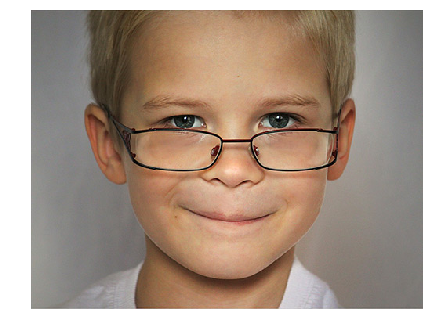

(382, 500, 3)


In [7]:

img = cv2.imread('img.PNG')
b,g,r = cv2.split(img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)
# to hide tick values on X and Y axis
plt.axis('off')
plt.show()
print(rgb_img.shape)

# Convert RGB to grey scaled image

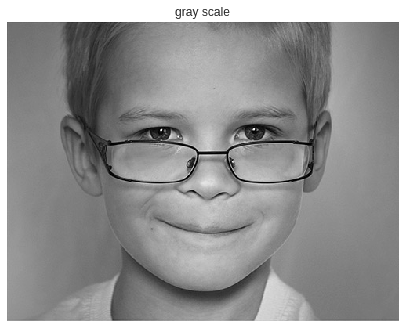

In [8]:
gray_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY);
#plt.subplot(221),plt.imshow(rgb_img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.imshow(gray_img,cmap="gray"),plt.title('gray scale'),plt.xticks([]), plt.yticks([])  
plt.show()


# Noise reduction using median Filter

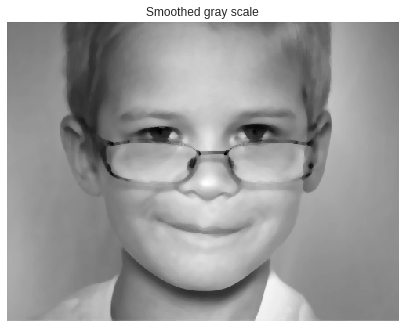

In [9]:
smoothed_img = cv2.medianBlur(gray_img,7)
#plt.subplot(221),plt.imshow(gray_img,cmap="gray"),plt.title('gray scale'),plt.xticks([]), plt.yticks([])
plt.imshow(smoothed_img,cmap="gray"),plt.title('Smoothed gray scale'),plt.xticks([]), plt.yticks([])  
plt.show()

# Edge detection using laplacian filter

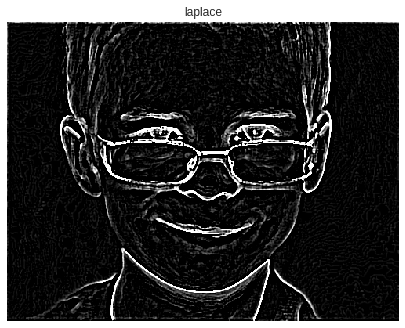

In [10]:
laplace_img=cv2.Laplacian( smoothed_img, cv2.CV_8U, ksize=5)
#laplacian = np.uint8(np.absolute(laplace_img))
#plt.subplot(221),plt.imshow(gray_img,cmap="gray"),plt.title('smoothed image'),plt.xticks([]), plt.yticks([])
plt.figure()
plt.imshow(laplace_img,cmap='gray'),plt.title('laplace'),plt.xticks([]), plt.yticks([])
plt.show()

# Edge Thresholding




(<matplotlib.image.AxesImage at 0x7faa3ca8f110>,
 Text(0.5,1,u'thresh'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

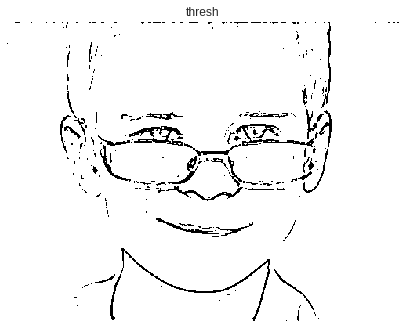

In [11]:
ret,thresh1 = cv2.threshold(laplace_img,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh1),plt.title('thresh'),plt.xticks([]), plt.yticks([])

# Resizing the original image for using the bilateral filter more efficently

(191, 250, 3)


(<matplotlib.image.AxesImage at 0x7faa3ca6a310>,
 Text(0.5,1,u'smoothed image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

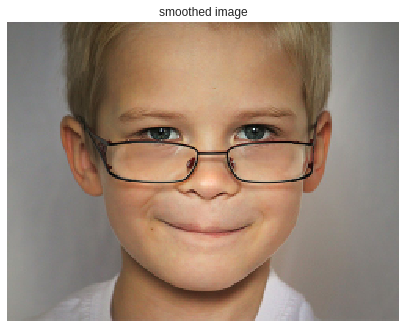

In [12]:
sized_img = cv2.resize(rgb_img,None,fx=0.5,fy=0.5)
print(sized_img.shape)

plt.imshow(sized_img),plt.title('smoothed image'),plt.xticks([]), plt.yticks([])

# Apply a small bilateral filter several times for an optimized time performance

(<matplotlib.image.AxesImage at 0x7faa3c9af650>,
 Text(0.5,1,u'smoothed image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

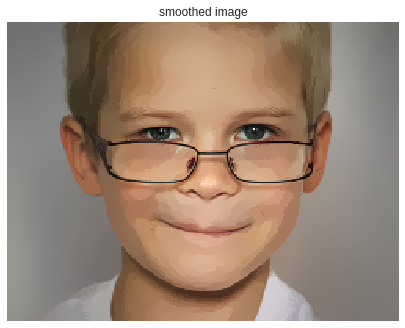

In [13]:
bilateral_img=sized_img


for i in range (0,6):
  bilateral_img=cv2.bilateralFilter(bilateral_img,9,9,7)
  
plt.imshow(bilateral_img),plt.title('smoothed image'),plt.xticks([]), plt.yticks([])